In [1]:
import pickle
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path = "processed_train.npz"
train_data = np.load(train_path)
test_path = "processed_val_in.npz"
test_data = np.load(test_path)

In [3]:
train_data["X"].shape, test_data["X"].shape

((205942, 19, 5), (3200, 19, 5))

In [4]:
def inverse_transform_path(path, shift, rotation_matrix):
    if path.ndim == 2:
        return (np.linalg.inv(rotation_matrix) @ path.T).T + shift
    elif path.ndim == 3:
        path_normalize = np.zeros(path.shape)
        for i in range(path.shape[0]):
            path_normalize[i] = (np.linalg.inv(rotation_matrix) @ path[i].T).T + shift
        return path_normalize
    else:
        raise Exception("Invalid dimension")

In [5]:
X, y, shifts, rotations = train_data["X"][:, :, :2], train_data["y"], train_data["shifts"], train_data["rotation_matrices"]
for i in range(len(X)):
    X[i] = inverse_transform_path(X[i], shifts[i], rotations[i])
    y[i] = inverse_transform_path(y[i], shifts[i], rotations[i])
X2, shifts, rotations = test_data["X"][:, :, :2], test_data["shifts"], test_data["rotation_matrices"]
for i in range(len(X2)):
    X2[i] = inverse_transform_path(X2[i], shifts[i], rotations[i])

In [6]:
x_min = np.min([X[:, :, 0].min(), X2[:, :, 0].min()])
x_max = np.max([X[:, :, 0].max(), X2[:, :, 0].max()])
y_min = np.min([X[:, :, 1].min(), X2[:, :, 1].min()])
y_max = np.max([X[:, :, 1].max(), X2[:, :, 1].max()])

Text(0.5, 1.0, 'Heatmap of input positions in testing set')

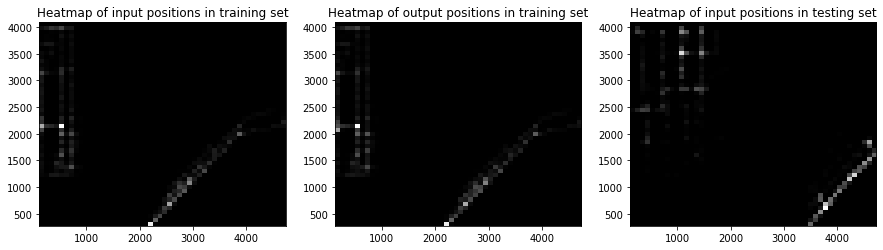

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

heatmap, xedges, yedges = np.histogram2d(X[:, :, 0].reshape(-1), X[:, :, 1].reshape(-1), bins=50)
ax[0].imshow(heatmap.T, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap="gray")
ax[0].set_title("Heatmap of input positions in training set")

heatmap, xedges, yedges = np.histogram2d(y[:, :, 0].reshape(-1), y[:, :, 1].reshape(-1), bins=50)
ax[1].imshow(heatmap.T, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap="gray")
ax[1].set_title("Heatmap of output positions in training set")

heatmap, xedges, yedges = np.histogram2d(X2[:, :, 0].reshape(-1), X2[:, :, 1].reshape(-1), bins=50)
ax[2].imshow(heatmap.T, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap="gray")
ax[2].set_title("Heatmap of input positions in testing set")

(-0.5, 49.5, -0.5, 49.5)

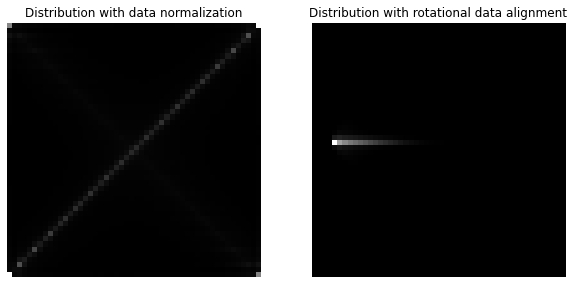

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
X_normalized = (X - X.min(axis=1, keepdims=True)) / (X.max(axis=1, keepdims=True) - X.min(axis=1, keepdims=True))
heatmap, xedges, yedges = np.histogram2d(X_normalized[:, :, 0].reshape(-1), X_normalized[:, :, 1].reshape(-1), bins=50)
ax[0].imshow(heatmap.T, origin='lower', cmap="gray")
ax[0].set_title("Distribution with data normalization")
ax[0].axis('off')

heatmap, xedges, yedges = np.histogram2d(train_data["X"][:, :, 0].reshape(-1), train_data["X"][:, :, 1].reshape(-1), bins=50)
ax[1].imshow(heatmap.T, origin='lower', cmap="gray")
ax[1].set_title("Distribution with rotational data alignment")
ax[1].axis('off')

In [10]:
X_normalized.shape

(205942, 19, 2)

In [20]:
for i in range(20):
    plt.plot(train_data["X"][i, :, 0], train_data["X"][i, :, 1])
    #plt.plot(train_data["y"][i, :, 0], train_data["y"][i, :, 1])
plt.title("samples of aligned trajectories")

MemoryError: Unable to allocate 149. MiB for an array with shape (19564490,) and data type float64